### Problem 1
Let $D = \{X, y\}$ be the collected data, where $X \in \mathbb{R}^{n \times p}$ is the design matrix with full rank and $y \in \mathbb{R}^n$ is the vector of response. Consider the following optimization problem \begin{equation} \label{eq:problem_1} \hat{\beta} = \arg\min\{\lVert b \rVert_2: b \text{ minimizes } \dfrac{1}{2n}(\lVert y - Xb \rVert_2)^2\}. \end{equation}

#### 1(a)
Show that the optimal solution of Equation \ref{eq:problem_1} is $\hat{\beta} = (X^T X)^{-1} X^T y$ when $n \geq p$, and $\hat{\beta} = X^T (XX^T)^{-1} y$ when $n < p$. What is the degrees of freedom based on Stein’s lemma: $df = E\left[\sum_i \dfrac{\partial \hat{y_i}}{\partial y_i}\right]$?

First let $k = \min\{n, p\}$. Unless specified, the norms $\lVert \rVert$ in this problem refers to the $2$-norm.

Note $\beta$ minimizes $\lVert y - X b \rVert^2$ iff $X\beta$ is the orthogonal projection of $y$ onto the column space of $X$ as a subspace $U$ of $\mathbb{R}^m$ since $\lVert X\beta \rVert^2 + \lVert y - X\beta \rVert^2 = \lVert y \rVert^2$, so there is a unique $X\beta$ that minimize the distance from $y$. Then we denote the singular value decomposition of $X = VDU^T$, where $D = \text{diag}(\lambda_1, \cdots, \lambda_k, 0, \cdots, 0)$. Define $D^+ = \text{diag}({\lambda_1}^{-1}, \cdots, {\lambda_k}^{-1}, 0, \cdots, 0)$, the pseudo-inverse of $X$ is defined as $X^+ = UD^+ V^T$. We claim the solution of the problem $\hat{\beta} = \text{arg} \min_b \lVert y - Xb \rVert^2$ is given by $\beta^+ = X^+ y = UD^+ V^T y$. Therefore, this $\beta^+$ also solves the problem $\text{arg} \min_b (\lVert y - Xb \rVert^2)/(2n)$.

\underline{Proof}

Assume $D$ is rectangular and diagonal. If $X = D$, then $b = D^+ y = X^+ y$ minimizes $\lVert y - X b\rVert^2$.

Otherwise, we may write $\lVert y - X b\rVert = \lVert y - VDU^T b\rVert = \lVert V^T(y - VDU^T b) \rVert = \lVert V^T y - DU^T b \rVert$ since ($V$ and therefore) $V^T$ is an isometry regarding the $2$-norm such that $V^T V = I$ and $\lVert V^T x \rVert = \lVert x \rVert$ for all $x \in \mathbb{R}^n$. Also since $U$ is surjective, $\lVert y - Xb \rVert$ is minimized iff $\lVert D \gamma - V^T y\rVert$ is minimized, where $\gamma = U^T b$. The solution to the latter condition is then $\hat{\gamma} = D^+ V^T y$. Then the solution to the problem $\hat{\beta} = \text{arg}\min_b \lVert y - Xb \rVert^2$ is given by $\hat{\beta} = UD^+ V^T y = X^+ y$;

Furthermore, the Moore-Penrose inverse of $X$ is given by \begin{equation*} X^+ = \begin{cases} (X^TX)^{-1} X^T & \text{ when } X \text{ has linearly independent columns, i.e. } n \geq p, \\ XT(XX^T)^{-1} & \text{ when } X \text{ has linearly independent rows, i.e. } n < p, \end{cases} \end{equation*} which fulfill Moore-Penrose conditions. Since the pseudo-inverse is unique, and the optimization problem is $\text{arg}\min_b \lVert y - X b \rVert^2$ divided by $2n$ (a constant), the optimal solution of the optimization problem is also given by $\hat{\beta} = X^+ y$. $\Box$

As for the degrees of freedom, note the prediction of $y$ is given by $\hat{y} = X \hat{\beta}$. Then the degrees of freedom should be $\text{trace}(XX^+) = \begin{cases} \text{trace}(X(X^TX)^{-1}X^T) & \text{ if } n \geq p \\ \text{trace}(XX^T(XX^T)^{-1}) & \text{ if } n < p  \end{cases} = \min\{n, p\} = k$. $\Box$

#### 1(b)

Mikhail Belkin et al. (2019) PNAS paper “Reconciling modern machine-learning practice and the classical bias–variance trade-off” demonstrated the double decent phenomenon for many machine learning methods. Let $\gamma = p/n$. Can you use simulation study to demonstrate the double decent phenomenon with the above linear model in the underparameterized regime ($\gamma$ < 1), overparameterized regime ($\gamma$ > 1) and the special regime ($\gamma$ = 1)? It would be great if you can show the pattern of bias-variance tradeoff in these different regimes. For example, you may use the value of $\gamma$ as the $x$-axis, and use squared bias and variance as the y-axis to visualize the bias-variance tradeoff. Of course, the answer to this part is quite open.

#### The generated sample

A sample of size $n = 200$ was simulated from the following setting: \begin{equation} Y = X_{200 \times p} B_{p \times 1} + R, \end{equation} where $[X_{ij}] \overset{i.i.d.}{\sim} N(0, 0.25^2), \beta_i \overset{i.i.d.}{\sim} N(0, 0.25^2), \epsilon_i \overset{i.i.d.}{\sim} N(0, 1)$ for $i = 1, 2, \cdots, 200$ and $j = 1, 2, \cdots, p$.

Only $\epsilon$s are considered random when fitting the OLS regression model. $n$ is fixed at 200 while we try to change the value of $p$ from 1 to 400 so we can observe if double decent would appear as we increase $p$. $70\%$ data is assigned for training and the remaining $30\%$ is for testing.

The following procedures are repeated for $R = 200$ times.

For each dimension $p = 1, 2, \cdots, 400$, we generate the design matrix whose elements are from $[X_{200 \times p}]_{ij} \overset{i.i.d.}{\sim} N(0, 0.25^2)$. Since we keep changing the dimension of $X$, we cannot fix a certain design matrix. Then we predict $Y$ and call the prediction $\hat{Y}$. Define $\theta^{(r)}$ as the value in the $r^{\text{th}}$ replication for any parameter $\theta$. For the training data, the average bias squared is calculated as \begin{equation} \overline{\text{Bias}} = \dfrac{1}{R}\dfrac{1}{0.7n} \sum_{i = 1}^{0.7n} \sum_{r = 1}^R \left({\hat{y_i}}^{(r)} - y_i\right).\end{equation} The average variance is calculated as \begin{equation} \overline{\text{Var}} = \dfrac{1}{R}\dfrac{1}{0.7n} \sum_{i = 1}^{0.7n} \sum_{r = 1}^R \left({\hat{y_i}}^{(r)} - \dfrac{1}{R} \sum_{s = 1}^{R} {\hat{y_i}}^{(s)}\right)^2.\end{equation} For the testing data, the $0.7n$ is changed to $0.3n$.

The code and the plots are shown below. The $y$-axis is the MSE, average variance, average bias for both training and testing data, while the $x$-axis is $\gamma = p/n$.

In [1]:
from numpy import linspace as lins
from numpy.random import normal, default_rng
from numpy.linalg import pinv
from sklearn.model_selection import train_test_split as TTS
import time

In [2]:
def workflow_1b(repeats, test_ratio):

    n = 200  # sample size
    ps = lins(1, 2 * n, 2 * n)  # endpoint=True
    
    theps = ps/n

    mu_x, mu_b, mu_e, sigma_x, sigma_b, sigma_e = 0, 0.2, 0, 0.2, 0, 1
    var_x, var_b, var_e = sigma_x ** 2, sigma_b ** 2, sigma_e ** 2

    bias_train, vars_train, bias_test, vars_test =\
        [0] * len(ps), [0] * len(ps), [0] * len(ps), [0] * len(ps)
    
    rng = default_rng(42)

    for p in ps:

        gamma = p / n
        train_bias, train_vars, test_bias, test_vars = [], [], [], []
        
        X = rng.normal(mu_x, var_x, (n, int(p)))  # X
        B = rng.normal(mu_b, var_b, (int(p), 1))  # Beta
        R = rng.normal(mu_e, var_e, (n, 1))       # eRRoR

        # Underlying model
        Y = X @ B + R  # matrix product

        for i in range(repeats):

            # Train test split
            X_train, X_test, Y_train, Y_test = TTS(
                X, Y, test_size = test_ratio, random_state = i)

            # Estimate the parameter beta_i in B
            if gamma <= 1:  # i.e. n >= p
                B_pred = pinv(X_train.transpose() @ X_train) @ (
                    X_train.transpose() @ Y_train)
            else:           # i.e. n < p
                B_pred = X_train.transpose() @ pinv(
                    X_train @ X_train.transpose()) @ Y_train

            Y_train_pred = X_train @ B_pred
            Y_test_pred = X_test @ B_pred

            train_bias.append((sum((Y_train_pred - Y_train) ** 2) /
                               ((1 - test_ratio) * n))[0])
            train_vars.append((sum((Y_train_pred - sum(Y_train_pred) /
                                    repeats) ** 2) / ((1 - test_ratio) * n))[0])
            test_bias.append((sum((Y_test_pred - Y_test) ** 2) /
                              (test_ratio * n))[0])
            test_vars.append((sum((Y_test_pred - sum(Y_test_pred) /
                                    repeats) ** 2) / (test_ratio * n))[0])

        # for each p
        bias_train[int(p)-1] = sum(train_bias) / (repeats)
        bias_test[int(p)-1] = sum(test_bias) / (repeats)
        vars_train[int(p)-1] = sum(train_vars) / (repeats)
        vars_test[int(p)-1] = sum(test_vars) / (repeats)

    return bias_train, bias_test, vars_train, vars_test, theps

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

Problem 1(b) takes 1747.5270249999999 seconds!


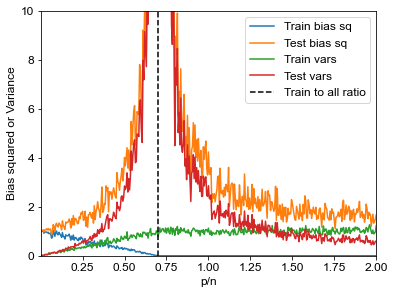

In [4]:
start = time.perf_counter()

# workflow
tr_1b = 0.3 # test to total ratio

# the main statement
bias_train, bias_test, vars_train, vars_test, theps = workflow_1b(
    repeats=200, test_ratio=tr_1b)

end = time.perf_counter()

print("Problem 1(b) takes {} seconds!".format(end - start))

max_1b = max(max(bias_train), max(bias_test), max(vars_train), max(vars_test))

figa, axea = plt.subplots(figsize=(6, 4.5))
axea.set_xlabel('p/n')
axea.set_ylabel('Bias squared or Variance')
axea.plot(theps, bias_train, label="Train bias sq")
axea.plot(theps, bias_test, label="Test bias sq")
axea.plot(theps, vars_train, label="Train vars")
axea.plot(theps, vars_test, label="Test vars")
axea.plot([1 - tr_1b, 1 - tr_1b], [0, max_1b], 'k--', label="Train to all ratio")
axea.legend()
plt.xlim(min(theps), max(theps))
plt.ylim(0, 10)
plt.show()

It's actually interesting to observe that given $t_r$ being the size ratio of the test set to the whole data set, which equals 0.3 in this simulation study, the peak of the test set bias squared and variance is located around $\lambda = 1 - t_r = 0.7$. Before that, both quantities go up quick, and go down a bit slower with a few flucuations. In contrast, the training bias squared goes down to near 0 and the training variance goes up steadily to around 1 as $\lambda$ approaches $1 - t_r$, and remain almost constant all the way after. This figure shows the double descent phenomena bewteen the training bias squared and test bias squared, which looks similar to Figure 4 about the fully connected neural network on MNIST of the original paper. Sadly the classical bias-variance trade-off does not appear before $\lambda$ hits $1 - t_r$. $\Box$

#### 1(c)
Intialize $\beta^{(0)} = 0$, and gradient descent on the least square loss yields \begin{equation} \label{eq:beta_updates}
    \beta^{(k)} = \beta^{(k-1)} + \dfrac{\epsilon}{n} X^T (y - X\beta^{(k-1)}), \end{equation}
where we take $0 < \epsilon \leq 1/\lambda_{\max, X^T X/n}$.
Will the gradient descent converge to the optimal solution given in (a)? Please justify your answer.

Rearrange the equation gives \begin{equation} \beta^{(t)} = \left(I - \epsilon \dfrac{X^T X}{n}\right) \beta^{(t - 1)} + \epsilon \dfrac{X^T X}{n} := A\beta^{(t-1)} + c. \end{equation} Then \begin{equation} \begin{split}
A\beta^{(t)} &= A\beta^{(t-1)} + c = A^2\beta^{(t-2)} + (I+A)c = \cdots \\ 
&= A^t \beta^{(0)} + (I + A + A^2 + \cdots + A^{t-1})c \\
&= A^t \beta^{(0)} + (I - A)^{-1}(I + A^t)c \quad \text{ } \quad \text{ (if } X^T X \text{ is invertible)} \\
&= A^t \beta^{(0)} + \dfrac{n}{\epsilon}(X^T X)^{-1} (1 + A^t) \dfrac{\epsilon}{n} X^T y = A^t \beta^{(0)} + (X^T X)^{-1} X^T y + (X^T X)^{-1} A^t X^T y
\end{split} \end{equation} and we claim $\lim_{t \to +\infty} A^t = 0$.

\underline{Proof}

We diagonalize $X^T X = PDP^T$, where $D = \text{diag}(\lambda_1, \cdots, \lambda_p)$, where $\{\lambda_i\}$ are the eigenvalues of $X^T X$ in descending order, and $P$ is the corresponding orthogonal matrix of eigenvectors. Then we rewrite $A$ in this way:

\begin{equation} \begin{split}
A &= I - \dfrac{\epsilon}{n} X^T X = PP^T - \dfrac{\epsilon}{n} PDP^T \\
&= P(I - \dfrac{\epsilon}{n} D) P^T = P \text{ diag}\left(1 - \dfrac{\epsilon \lambda_i}{n}\right)_{i = 1, 2, \cdots, p} P^T. \end{split} \end{equation}

Given that $\epsilon \leq [\lambda_{\max}(X^T X)]^{-1}$, since $X^TX$ has no linear dependent columns so that $\lambda_i < \lambda_{\max} \equiv \lambda_1$, and therefore $\epsilon \lambda_i \leq \lambda_i/\lambda_{\max} < 1$ for all $i \geq 2$. Then \begin{equation} \begin{split}
\lim_{t \to +\infty} A^t &= \lim_{t \to +\infty} PD^t P^T \\
&= \lim_{t \to +\infty} P \text{ diag}\left(1 - \dfrac{\epsilon \lambda_i}{n}\right)^t_{i = 1, 2, \cdots, p} P^T \quad \text{ since } 1 - \dfrac{\epsilon \lambda_i}{n} < 1 \\
&= 0 \Rightarrow \lim_{t \to +\infty} \beta^{(t)} = 0 + (X^TX)^{-1}X^T y + 0 = (X^TX)^{-1}X^T y \end{split} \end{equation} if $X^T X$ is invertible, i.e. the gradient descent converges to the optimal solution in (a) only if $n \geq p$. $\Box$

#### 1(d)
Given the gradient flow DE for the LS problem -- $\min (\lVert y - Xb \rVert_2)^2/(2n)$: \begin{equation} \label{eq:dbeta_dt}
    \dfrac{d\beta(t)}{dt} = \dfrac{X^T(y - X\beta(t))}{n},
\end{equation} what is the exact solution path $\beta(t)$ to Eq. \ref{eq:dbeta_dt} for all $t$?

Rearrange the terms of the equation gives $\dfrac{d\beta}{dt} + \left[\dfrac{X^T X}{n} \right] \beta = \dfrac{X^T y}{n}$. Let $B = \dfrac{X^T X}{n}$ and $C = \dfrac{X^T y}{n}$, which $B^{-1} e^{Bt} = e^{Bt}B^{-1}$ for $t > 0$ because \begin{equation} \label{eq:exp_inv}
\begin{split}
    B^{-1} e^{Bt} &= B^{-1} \sum_{k = 0}^{\infty} \dfrac{1}{k!} (Bt)^{k+1}(Bt)^{-1} = B^{-1} \sum_{k = 0}^{\infty} \dfrac{1}{k!} (Bt)^{k+1} \dfrac{B^{-1}}{t} \\
    &= \left[(Bt)^{-1} \sum_{k = 0}^{\infty} \dfrac{1}{k!} (Bt)^{k+1}\right] B^{-1} = \sum_{k = 0}^{\infty} \dfrac{(Bt)^k}{k!} B^{-1} = e^{Bt}B^{-1},
\end{split}
\end{equation} then we may solve Eq. \ref{eq:dbeta_dt} using the integration factor $e^{Bt} = \sum_{k = 0}^{\infty} (Bt)^k/k!$:

\begin{equation} \begin{split}
    \dfrac{d\beta}{dt} + B\beta &= C \\
    \Rightarrow \beta(t) &= \dfrac{\int e^{Bt} C \,dt}{e^{Bt}} = \dfrac{B^{-1} e^{Bt} C + d}{e^{Bt}} = B^{-1} C + de^{-Bt} \\
    \text{but } \beta(t = 0) = 0 &= B^{-1} C + d \Rightarrow d = -B^{-1} C; \\
    \Rightarrow \beta(t) &= e^{-Bt}(B^{-1} e^{Bt} C - B^{-1} C) \\
    &= (e^{-Bt} e^{Bt} B^{-1} - e^{-Bt} B^{-1} C \quad \text{ (from Eq. } \ref{eq:exp_inv}) \\
    &= (I - e^{-Bt}) B^{-1} C = (I - e^{-Bt})(X^T X)^{-1} X^T y. \text{ } \Box 
\end{split} \end{equation}

#### 1(e)
Use simulation study to investigate the differences between the solution of Ridge regression: \begin{equation} \hat{\beta}(\lambda) = (X^T X + n \lambda I)^{-1} X^T y \end{equation} and the solution of the gradient flow $\hat{\beta}(t)$. You may compare the similarity of their solution paths and their prediction accuracies along the solution paths.

One may consider $\beta(0) = 0$ is a prior knowledge and $t$ is the tuning parameter of the shrinkage. \begin{itemize} 
    \item When $t = 0$, we put all weight to the prior knowledge;
    \item When $t \to +\infty$, we ignore the prior knowledge.
\end{itemize}

The similarity between ridge regression and gradient flow is that they are both shrinkage estimations of the regression coefficient. The difference is that the ridge regression shrinks the parameters to 0 in constant proportion while the gradient flow shrinks the parameters to 0 in decreasing proportion from larger magnitudes. The shrinkage term about the gradient flow is $\exp(-X^TX / n)$, which is the matrix exponential of the sample covariance matrix. The gradient flow considers the correlation between $\beta$s when shrinking.

#### Another generated sample

Another sample of size $n = 200$ was simulated from the following setting: \begin{equation} Y = X_{800 \times 5} B_{5 \times 1} + R, \end{equation} where $[X_{ij}] \overset{i.i.d.}{\sim} N(0, 1^2), \beta_i \overset{i.i.d.}{\sim} N(0, 1^2), \epsilon_i \overset{i.i.d.}{\sim} N(0, 5^2)$ for $i = 1, 2, \cdots, 800$ and $j = 1, 2, \cdots, 5$. The errors are intentionally set to have a high variance for modelling noisy data.

??? replications were done. In each replication, the dataset is divided into training subset, validation set and testing set. The tuning parameters are found using ???-fold cross validation with MSE measure. From the plots, we can see the average validation MSE after running for ??? times for ridge regression and gradient flow are minimized at their own unique values.

### Problem 2


#### 2(a)
Denote $\mu_i := \begin{bmatrix} \mu_{A, i} \\ \mu_{B, i} \end{bmatrix} \sim N_2(0, \Sigma)$ and $z := \begin{bmatrix} z_{A, i} \\ z_{B, i} \end{bmatrix}$. Then we know $\mu_i | z_i \sim N((\Sigma^{-1} + I)^{-1} z_i, (\Sigma^{-1} + I)^{-1})$ and we need to estimate the posterior covariance matrix $\Sigma_p := (\Sigma^{-1} + I)^{-1}$. Note since $z_i \sim N(0, I + \Sigma)$ so that \begin{equation}
    V = \sum_{i = 1}^n (z_i)^T (z_i) \sim W_2(\Sigma + I, n) \Rightarrow V^{-1} \sim (W_2)^{-1}((\Sigma + I)^{-1}, n),
\end{equation} where $W_2$ is a 2-variate Wishart distribution, and $(W_2)^{-1}$ is a 2-variate inverse Wishart distribution. We know \begin{equation}
    E(V) = \dfrac{1}{n - p - 1}(\Sigma + I)^{-1} = \dfrac{1}{n-3}(\Sigma + I)^{-1}.
\end{equation} Then we can derive an estimator for $A := (\Sigma + I)^{-1}$ as \begin{equation}
    \hat{A} = (n-3)V^{-1} = (n-3)\left(\sum_{i=1}^n (z_i)^T (z_i)\right)^{-1}.
\end{equation} Rewrite $\Sigma_p = (I + \Sigma^{-1})^{-1} = (I + \Sigma - I)(\Sigma + I)^{-1} = I - A$, then the estimator of $\Sigma_p$ is \begin{equation}
    \hat{\Sigma_p} = I - (n-3)\left(\sum_{i=1}^n (z_i)^T (z_i)\right)^{-1}.
\end{equation} Then the empirical Bayes estimate of the posterior mean is given by \begin{equation}
    \hat{E}(\mu_i | z_i) = \Bigg[I - (n-3)\bigg(\sum_{i=1}^n (z_i)^T (z_i) \bigg)^{-1} \Bigg]z_i. \text{ } \Box
\end{equation}

#### 2(b)
A 2-dimensional sample of size 200 was generated from the following model: \begin{equation}
	z = \begin{bmatrix} z_1 \\ z_2 \end{bmatrix} = \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix} + \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \end{bmatrix} = \mu + e \end{equation}

where $\mu \sim N_2\left(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & -0.5 \\ -0.5 & 1 \end{bmatrix}\right)$ and $e \sim N_2\left(0, I_{2 \times 2}\right)$. For the misspecification, the irrelavent term $f \sim N_2\left(0, 0.5^2I\right)$ is also added to $z$ on top of $\mu + e$.

In [5]:
from numpy.linalg import norm
from math import sqrt
from numpy import identity as I, empty

def workflow_2b(size, repeats):

    mu_x, cov_x = [0, 0], [[1, -0.5], [-0.5, 1]] # main, mu
    mu_e, cov_e = [0, 0], [[1, 0], [0, 1]] # residue, e
    mu_f, cov_f = [0, 0], [[0.5 ** 2, 0], [0, 0.5 ** 2]] # irrelavent, f

    mse_mle_ns, mse_mle_ys = empty((repeats, 2)), empty((repeats, 2))
    mse_js_ns, mse_js_ys = empty((repeats, 2)), empty((repeats, 2))

    for i in range(repeats):
        
        rng = default_rng(int(99*(i+1))) # fix the random state

        # the distribution mu, with mean mu_x
        x = rng.multivariate_normal(mu_x, cov_x, size)

        # plus the correct residue config (y) & the irrelavent terms (z)
        y = x + rng.multivariate_normal(mu_e, cov_e, size)
        z = y + rng.multivariate_normal(mu_f, cov_f, size)

        # and partition for graphing
        y1, y2, z1, z2 = y[:, 0], y[:, 1], z[:, 0], z[:, 1]

        # if the model is misspecified
        # MLE estimate & the MSE by MLE
        mu_mle_n = z[:, :]
        mse_mle_n = sum((mu_mle_n - x) ** 2) / size
        # JS estimate & the MSE by JSE
        mu_js_n = (1 - (size - 2) / norm(z[:, :].transpose() @ z[:, :])) * z[:, :]
        mse_js_n = sum((mu_js_n - x) ** 2) / size

        # if the model is specified
        # MLE estimate & the MSE by MLE
        mu_mle_y = y[:, :]
        mse_mle_y = sum((mu_mle_y - x) ** 2) / size
        # JS estimate & the MSE by JSE
        mu_js_y = (1 - (size - 2) / norm(y[:, :].transpose() @ y[:, :])) * y[:, :]
        mse_js_y = sum((mu_js_y - x) ** 2) / size

        mse_mle_ns[i, :], mse_mle_ys[i, :] = mse_mle_n, mse_mle_y
        mse_js_ns[i, :], mse_js_ys[i, :] = mse_js_n, mse_js_y

    return mse_mle_ns.transpose(), mse_js_ns.transpose(),\
           mse_mle_ys.transpose(), mse_js_ys.transpose()

100 replications of the above process were made. The average MSE to each group (A and B) in the samples using MLE and James-Stein Estimator (JSE) was represented in the following.

In [6]:
start = time.perf_counter()
n = 200
times = 100
msemns, msejns, msemys, msejys = workflow_2b(size=n, repeats=times)
end = time.perf_counter()
print("The workflow takes {} seconds!".format(end - start))

The workflow takes 0.09367940000015551 seconds!


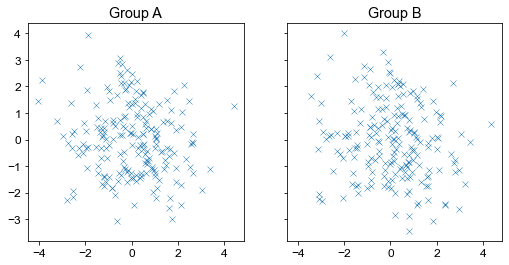

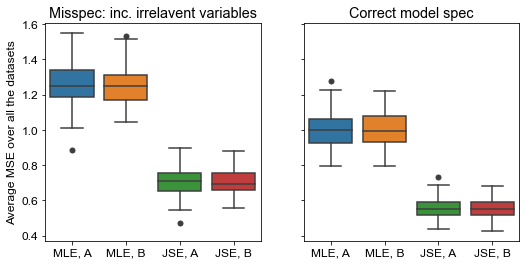

In [7]:
import seaborn as sns
from pandas import DataFrame as df

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

mlena, mlenb = msemns[0, :].tolist(), msemns[1, :].tolist()
jsna, jsnb = msejns[0, :].tolist(), msejns[1, :].tolist()
mleya, mleyb = msemys[0, :].tolist(), msemys[1, :].tolist()
jsya, jsyb = msejys[0, :].tolist(), msejys[1, :].tolist()

my_dict_n = {'MLE, A': mlena, 'MLE, B': mlenb, 'JSE, A': jsna, 'JSE, B': jsnb}
my_dict_y = {'MLE, A': mleya, 'MLE, B': mleyb, 'JSE, A': jsya, 'JSE, B': jsyb}

datan, datay = df(my_dict_n), df(my_dict_y)

flierprops = dict(marker='o')

# the plots about the MSEs
figg, [axeg, axeh] = plt.subplots(
    nrows=1, ncols=2, figsize=(8.5, 4), sharey=True)
sns.boxplot(data=datan, ax=axeg, flierprops=flierprops)
sns.boxplot(data=datay, ax=axeh, flierprops=flierprops)
axeg.set_title("Misspec: inc. irrelavent variables")
axeg.set_ylabel("Average MSE over all the datasets")
axeh.set_title("Correct model spec")
plt.show()

In [8]:
eff_an, eff_bn = sum(mlena)/sum(jsna), sum(mlenb)/sum(jsnb)
eff_ay, eff_by = sum(mleya)/sum(jsya), sum(mleyb)/sum(jsyb)
list_n, list_y = sum(msemns)/sum(msejns), sum(msemys)/sum(msejys)
eff_n, eff_y = sum(list_n)/len(list_n), sum(list_y)/len(list_y)

print("The MSE ratio of MLE to JSE when the model is misspecified "
      "and the model is correct are "
      "{:.3f} and {:.3f} respectively.".format(eff_n, eff_y))

print("By focusing on group A, the above ratios become "
      "{:.3f} and {:.3f} respectively.".format(eff_an, eff_ay))

print("By focusing on group B, the above ratios become "
      "{:.3f} and {:.3f} respectively.".format(eff_bn, eff_by))

The MSE ratio of MLE to JSE when the model is misspecified and the model is correct are 1.786 and 1.813 respectively.
By focusing on group A, the above ratios become 1.782 and 1.811 respectively.
By focusing on group B, the above ratios become 1.785 and 1.810 respectively.


#### 2(c)
We can observe that when the model is misspecified, the MSE for both MLE and JSE are both larger than that when the model is correct. In both cases, JSE performed much better than MLE from the boxplot. Comparing the MSE ratio of misspecified and correct model (1.786 vs 1.813), the ratio in the correct model is a bit higher. Specifically,
\begin{itemize}
    \item When the model is correctly specified, the JSE performs much better than MLE in both groups, giving smaller MSE on average.
    \item When the model is incorrectly specified, the MSE will be larger on average. The JSE still performs
better than MLE though the efficiency measured in terms of MSE reduction is hindered because the model spec was set wrong by introducing irrelavant terms.
\end{itemize}

### Problem 3

#### 3(a)
Now that \begin{equation} \underline {z_{n \times 1}} = \underline {\beta_0} + W_u \underline u + W_n \underline n + \underline e, \end{equation} where $\underline u \sim N(0, (\sigma_1)^2 I), \underline n \sim N(0, (\sigma_2)^2 I), \underline e \sim N(0, (\sigma_e)^2 I)$ and $\underline {\beta_0} = \underline {1_{n \times 1}} \beta_0$, and $\underline z, W_u$, and $W_n$ are given, we need to estimate $\beta_0, (\sigma_1)^2, (\sigma_2)^2$ and $(\sigma_e)^2$. The likelihood of this mxied model can be written as \begin{equation} \text{Pr}(\underline z | \underline {\beta_0}, \underline u, \underline n, (\sigma_1)^2, (\sigma_2)^2, (\sigma_e)^2) = N(\underline z | \underline {\beta_0} + W_u \underline u + W_n \underline n, (\sigma_e)^2 I) \text{ with Pr}(\underline u) = N(0, (\sigma_1)^2 I) \text{ and Pr}(\underline n) = N(0, (\sigma_2)^2 I).\end{equation}

To obtain the likelihood without random effects from both the school and the subjects, we integrate out $\underline u$ and $\underline n$ respectively as \begin{equation} \begin{split} \text{Pr}(\underline z | \underline {\beta_0}, (\sigma_1)^2, (\sigma_2)^2, (\sigma_e)^2) &= \int \left(\int \text{Pr}(\underline z | \underline {\beta_0}, \underline u, \underline n, (\sigma_1)^2, (\sigma_2)^2, (\sigma_e)^2) \text{Pr}(\underline u) \,d\underline u\right) \text{Pr}(\underline n) \,d\underline n \\ &= N(\underline {\beta_0}, W_u (W_u)^T (\sigma_1)^2 + W_n (W_n)^T (\sigma_2)^2 + (\sigma_e)^2 I) \end{split} \end{equation}  since the likelihood, Pr$(\underline u)$ and Pr$(\underline n)$ are all Gaussian.

By multivariate Normal distribution, we obtain the log likelihood to be \begin{equation} \label{eq:log_likelihood} \begin{split} lL(\beta_0, (\sigma_1)^2, (\sigma_2)^2, (\sigma_e)^2) &= -\dfrac{1}{2}\Bigg[n \ln(2\pi (\sigma_1)^2) + \ln(\det(K_u + \delta_2 K_n + \delta_e I)) \\ &+ \dfrac{1}{(\sigma_1)^2}(\underline z - \underline {\beta_0})^T(K_u + \delta_2 K_n + \delta_e I)^{-1} (\underline z - \underline {\beta_0})\Bigg] \\ &= -\dfrac{1}{2}\Bigg[n \ln(2\pi (\sigma_1)^2) + \ln(\det(Q_u(S_{un} + \delta_e I)(Q_u)^T)) \\ &+ \dfrac{1}{(\sigma_1)^2}(\underline z - \underline {\beta_0})^T(Q_u(S_{un} + \delta_e I)(Q_u)^T)^{-1} (\underline z - \underline {\beta_0})\Bigg] \\ &= -\dfrac{1}{2}\Bigg[n \ln(2\pi (\sigma_1)^2) + \ln(\det(S_{un} + \delta_e I)) \\ &+ \dfrac{1}{(\sigma_1)^2}((Q_u)^T\underline z - (Q_u)^T \underline {\beta_0})^T(S_{un} + \delta_e I)^{-1} ((Q_u)^T\underline z - (Q_u)^T\underline {\beta_0})\Bigg] \end{split} \end{equation} where $K_u = W_u (W_u)^T, K_n = W_n (W_n)^T, \delta_2 = (\sigma_2/\sigma_1)^2$ and $\delta_e = (\sigma_e/\sigma_1)^2$. Also by eigenvalue decomposition, $M_u = K_u + \delta_2 K_n = Q_u(S_{un})(Q_u)^T$ and $I = (Q_u)(Q_u)^T$, so we can use the fact that $\det AB = \det BA$ and $(AB)^{-1} = B^{-1} A^{-1}$ to deduce the log likelihood as above. $S_{un} + \delta_e I$ should be a diagonal matrix, so the above expression can be further written as \begin{equation} \label{eq:log_like_sum} -\dfrac{1}{2} \Bigg[n \ln(2\pi(\sigma_1)^2) + \sum_{i=1}^n \ln([S_{un}]_{ii} + \delta_e) + \dfrac{1}{(\sigma_1)^2} \sum_{i=1}^n \dfrac{([(Q_u)^T\underline z]_i - [(Q_u)^T \underline {\beta_0}]_i)^2}{[S_{un}]_{ii} + \delta_e} \Bigg]. \end{equation}

Then by taking the gradient of the log likelihood in Eq. \ref{eq:log_likelihood} w.r.t. to $\underline {\beta_0}$ and set it to 0, yielding \begin{equation} \begin{split} 0 &= \dfrac{1}{(\sigma_1)^2}\left((Q_u)(S_{un} + \delta_e I)^{-1} ((Q_u)^T \underline z) - (Q_u)(S_{un} + \delta_e I)^{-1} ((Q_u)^T \underline {\beta_0})\right) \\ \Rightarrow (Q_u)(S_{un} + \delta_e I)^{-1} ((Q_u)^T \underline z) &= (Q_u)(S_{un} + \delta_e I)^{-1} ((Q_u)^T \underline {\beta_0}) = (Q_u)(S_{un} + \delta_e I)^{-1} ((Q_u)^T \beta_0) \\ \Rightarrow \hat {\beta_0} &= \left[(Q_u)(S_{un} + \delta_e I)^{-1} (Q_u)^T\right]^{-1} (Q_u)(S_{un} + \delta_e I)^{-1} ((Q_u)^T \underline z) \\ &= \sum_{i=1}^n \left[\dfrac{([Q_u]_{i:} [(Q_u)^T]_{i:})^2}{[S_{un}]_{ii} + \delta_e}\right]^{-1} \left[\dfrac{[Q_u]_{i:} [(Q_u)^T \underline z]_i}{[S_{un}]_{ii} + \delta_e}\right] \\ &= \sum_{i=1}^n \left[\dfrac{1}{[S_{un}]_{ii} + \delta_e}\right]^{-1} \left[\dfrac{[Q_u]_{i:} [(Q_u)^T \underline z]_i}{[S_{un}]_{ii} + \delta_e}\right] = \sum_{i=1}^n [Q_u]_{i:} [(Q_u)^T \underline z]_i. \end{split} \end{equation} 

Subbing the above $\hat{\beta_0}$ back to Eq. \ref{eq:log_like_sum}, and set the derivative w.r.t. to $(\sigma_1)^2$, giving \begin{equation} \begin{split} 0 &= \dfrac{1}{2}\left(\dfrac{n}{(\hat{\sigma_1})^2} - \dfrac{1}{(\hat{\sigma_1})^4} \sum_{i=1}^n \dfrac{\left([(Q_u)^T \underline z]_i - [(Q_u)^T]_{i:} \hat{\beta_0}\right)^2}{[S_{un}]_{ii} + \delta_e}\right) \\ \Rightarrow (\hat{\sigma_1})^2 &= \dfrac{1}{n} \sum_{i=1}^n \dfrac{\left([(Q_u)^T \underline z]_i - [(Q_u)^T]_{i:} \hat{\beta_0}\right)^2}{[S_{un}]_{ii} + \delta_e}. \end{split} \end{equation}

While to estimate $\sigma_2$, we mostly repeat the above process, which requires setting $\delta_1 = 1/\delta_2, \delta_f = \sigma_e/\sigma_2$, and the eigenvalue decomposition $M_n = K_n + \delta_1 K_u = Q_n(S_{nu})(Q_n)^T$ so that $I = (Q_n)(Q_n)^T$ too, so that we replace the last equation in this way: \begin{equation} (\hat{\sigma_2})^2 = \dfrac{1}{n} \sum_{i=1}^n \dfrac{\left([(Q_n)^T \underline z]_i - [(Q_n)^T]_{i:} \hat{\beta_0}\right)^2}{[S_{nu}]_{ii} + \delta_f}. \end{equation}

Eventually we plug in $\hat{\beta_0}$ and $(\hat{\sigma_1})^2$ into Eq. \ref{eq:log_like_sum}, the log likelihood becomes a function only of $\delta_e$ \begin{equation} lL(\delta_e) = -\dfrac{1}{2}\left[n \ln (2\pi) + \sum_{i=1}^n \ln\left([S_{un}]_{ii} + \delta_e\right) + n + n \ln \left(\dfrac{1}{n} \sum_{i=1}^n \dfrac{([(Q_u)^T \underline z]_i - [(Q_u)^T]_{i:} \hat{\beta_0})^2}{[S_{un}]_{ii} + \delta_e}\right)\right], \end{equation} so that finding the MlL of this model $\Leftrightarrow$ finding $\hat{\delta_e}$, the value of $\delta_e$ that maximize $lL(\delta_e)$.